# Frequency Analysis for South Florida (April - June)

NB: This ipynb is a mirror of our blog post published in our website: https://covid.dh.miami.edu/wp-admin/post.php?post=601

In order to run this script correctly, run every one of the steps once at a time and wait that th * symbol has turned into a number.

__Authors:__

* Susanna Allés Torrent, [susanna_alles@miami.edu](mailto:susanna_alles@miami.edu), University of Miami
* Dieyun Song, 
* Jerry Bonnell, [j.bonnell@miami.edu](mailto:j.bonnell@miami.edu), University of Miami



Our aim is to compare and contrast the top 50 most frequent words in our Twitter English and Spanish corpora of Florida from April 25th to June 25th, 2020. We divided it into 2 four-week periods to analyze broad trends and themes in the discourse. 


For our corpus criteria as well as for the keywords used to harvest our corpus, please refer to our blog post ["A Twitter Dataset for Digital Narratives"](https://covid.dh.miami.edu/2020/05/23/twitter-dataset-for-digital-narratives/).  As for our corpus, check our [GitHub repo](https://github.com/dh-miami/narratives_covid19/tree/master/twitter-corpus) for the ID datasets to recover tweets collections. 

## Top 50 words in South Florida from April 25th to May 25th: English vs Spanish

This Jupyter notebook (ipynb) is based on [*coveet*](https://github.com/dh-miami/narratives_covid19/tree/master/scripts/freq_analysis), "a Python script that retrieves basic statistics (most frequent words, bigrams, trigrams, top users, hashtags)" written by Jerry Bonnell. After installing and importing libraries needed (contained in the `requirements.txt` file), SAT: we could resume here with our words what this first lines are doing (but very general, since it needs to be a post in our wp site). Maybe the "coveet" infos can go here? 

In [1]:
!pip3 install -r requirements.txt  # may need to replace "pip3" with "conda"

In [2]:
import numpy as np
import pandas as pd
from coveet import count_ngrams, uniq_vocab_by_gl
from collections import Counter
from pprint import pprint
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None

In this first n-gram we can see the top 50 words from April 25th to May 25th and compare the occurrency in English and Spanish. SAT: Explain the role of stopwords and the fact that a the process is based in a csv file that, in this case will be called `dhcovid_2020-4-25_to_2020-5-25_en_es_fl.csv` (thanks to `pandas` package). And for technicallities you refer to the documentation of coveet... 

In [3]:
!python3 coveet.py query -g fl -l en es -d 2020-04-25 2020-05-25 -stopwords stopwords_en.txt stopwords_es.txt

Namespace(date=[datetime.datetime(2020, 4, 25, 0, 0), datetime.datetime(2020, 5, 25, 0, 0)], func=<function handle_query at 0x7fa9900a0710>, geo=['fl'], lang=['en', 'es'], stopwords=['stopwords_en.txt', 'stopwords_es.txt'])
wrote df to dhcovid_2020-4-25_to_2020-5-25_en_es_fl.csv!


In [4]:
df = pd.read_csv('dhcovid_2020-4-25_to_2020-5-25_en_es_fl.csv', index_col=0)

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['text'] = df['text'].str.split()
df['hashtags'] = df['hashtags'].str.split()

In [6]:
top_n = 50  # top 50 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)

In [7]:
col_name = 'text'  # set to either 'text' or 'hashtags'

In [8]:
df = df.dropna(subset=[col_name])

In [9]:
# counts is of the form: location, language, actual tuples
# count_ngrams returns a (default) dictionary of word tuples (ngrams) 
# with its associated frequency; we then use Counter from python collections 
# to tell us the top n most popular ones 
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df.groupby(["geo", "lang"])[col_name]}

Here are the exact counts for each word... 

In [10]:
pprint(counts)

{('fl', 'en'): [(('us',), 1603),
                (('pandemic',), 1548),
                (('new',), 1530),
                (('people',), 1202),
                (('coronavirus',), 1180),
                (('florida',), 1035),
                (('may',), 1028),
                (('help',), 913),
                (('trump',), 880),
                (('cases',), 868),
                (('get',), 852),
                (('health',), 837),
                (('like',), 752),
                (('one',), 746),
                (('time',), 742),
                (('due',), 738),
                (('deaths',), 700),
                (('home',), 682),
                (('crisis',), 671),
                (('testing',), 648),
                (('today',), 616),
                (('need',), 615),
                (('video',), 604),
                (('patients',), 601),
                (('dont',), 552),
                (('miami',), 550),
                (('day',), 538),
                (('news',), 533),
               

The visualization has been done with `matplotlib`.

In [11]:
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size

In [12]:
def plot_bar_matrix(counts):
    fig, axes = plt.subplots(1,2)
    flattened = axes.flatten()
    for i, ((geo, lang), geo_counts) in enumerate(counts.items()):
        labels = [" ".join(w) for w, _ in geo_counts]
        y = [n for _, n in geo_counts]
        cmap = plt.get_cmap('spring')
        colors = plt.get_cmap('spring')(np.linspace(0, 1, len(labels)))
        flattened[i].set_title(f"{geo} {lang}")
        flattened[i].barh(y=range(0,50), width=y, color=colors, tick_label=labels)
        flattened[i].invert_yaxis()  # reverse the visualization order along the y-axis

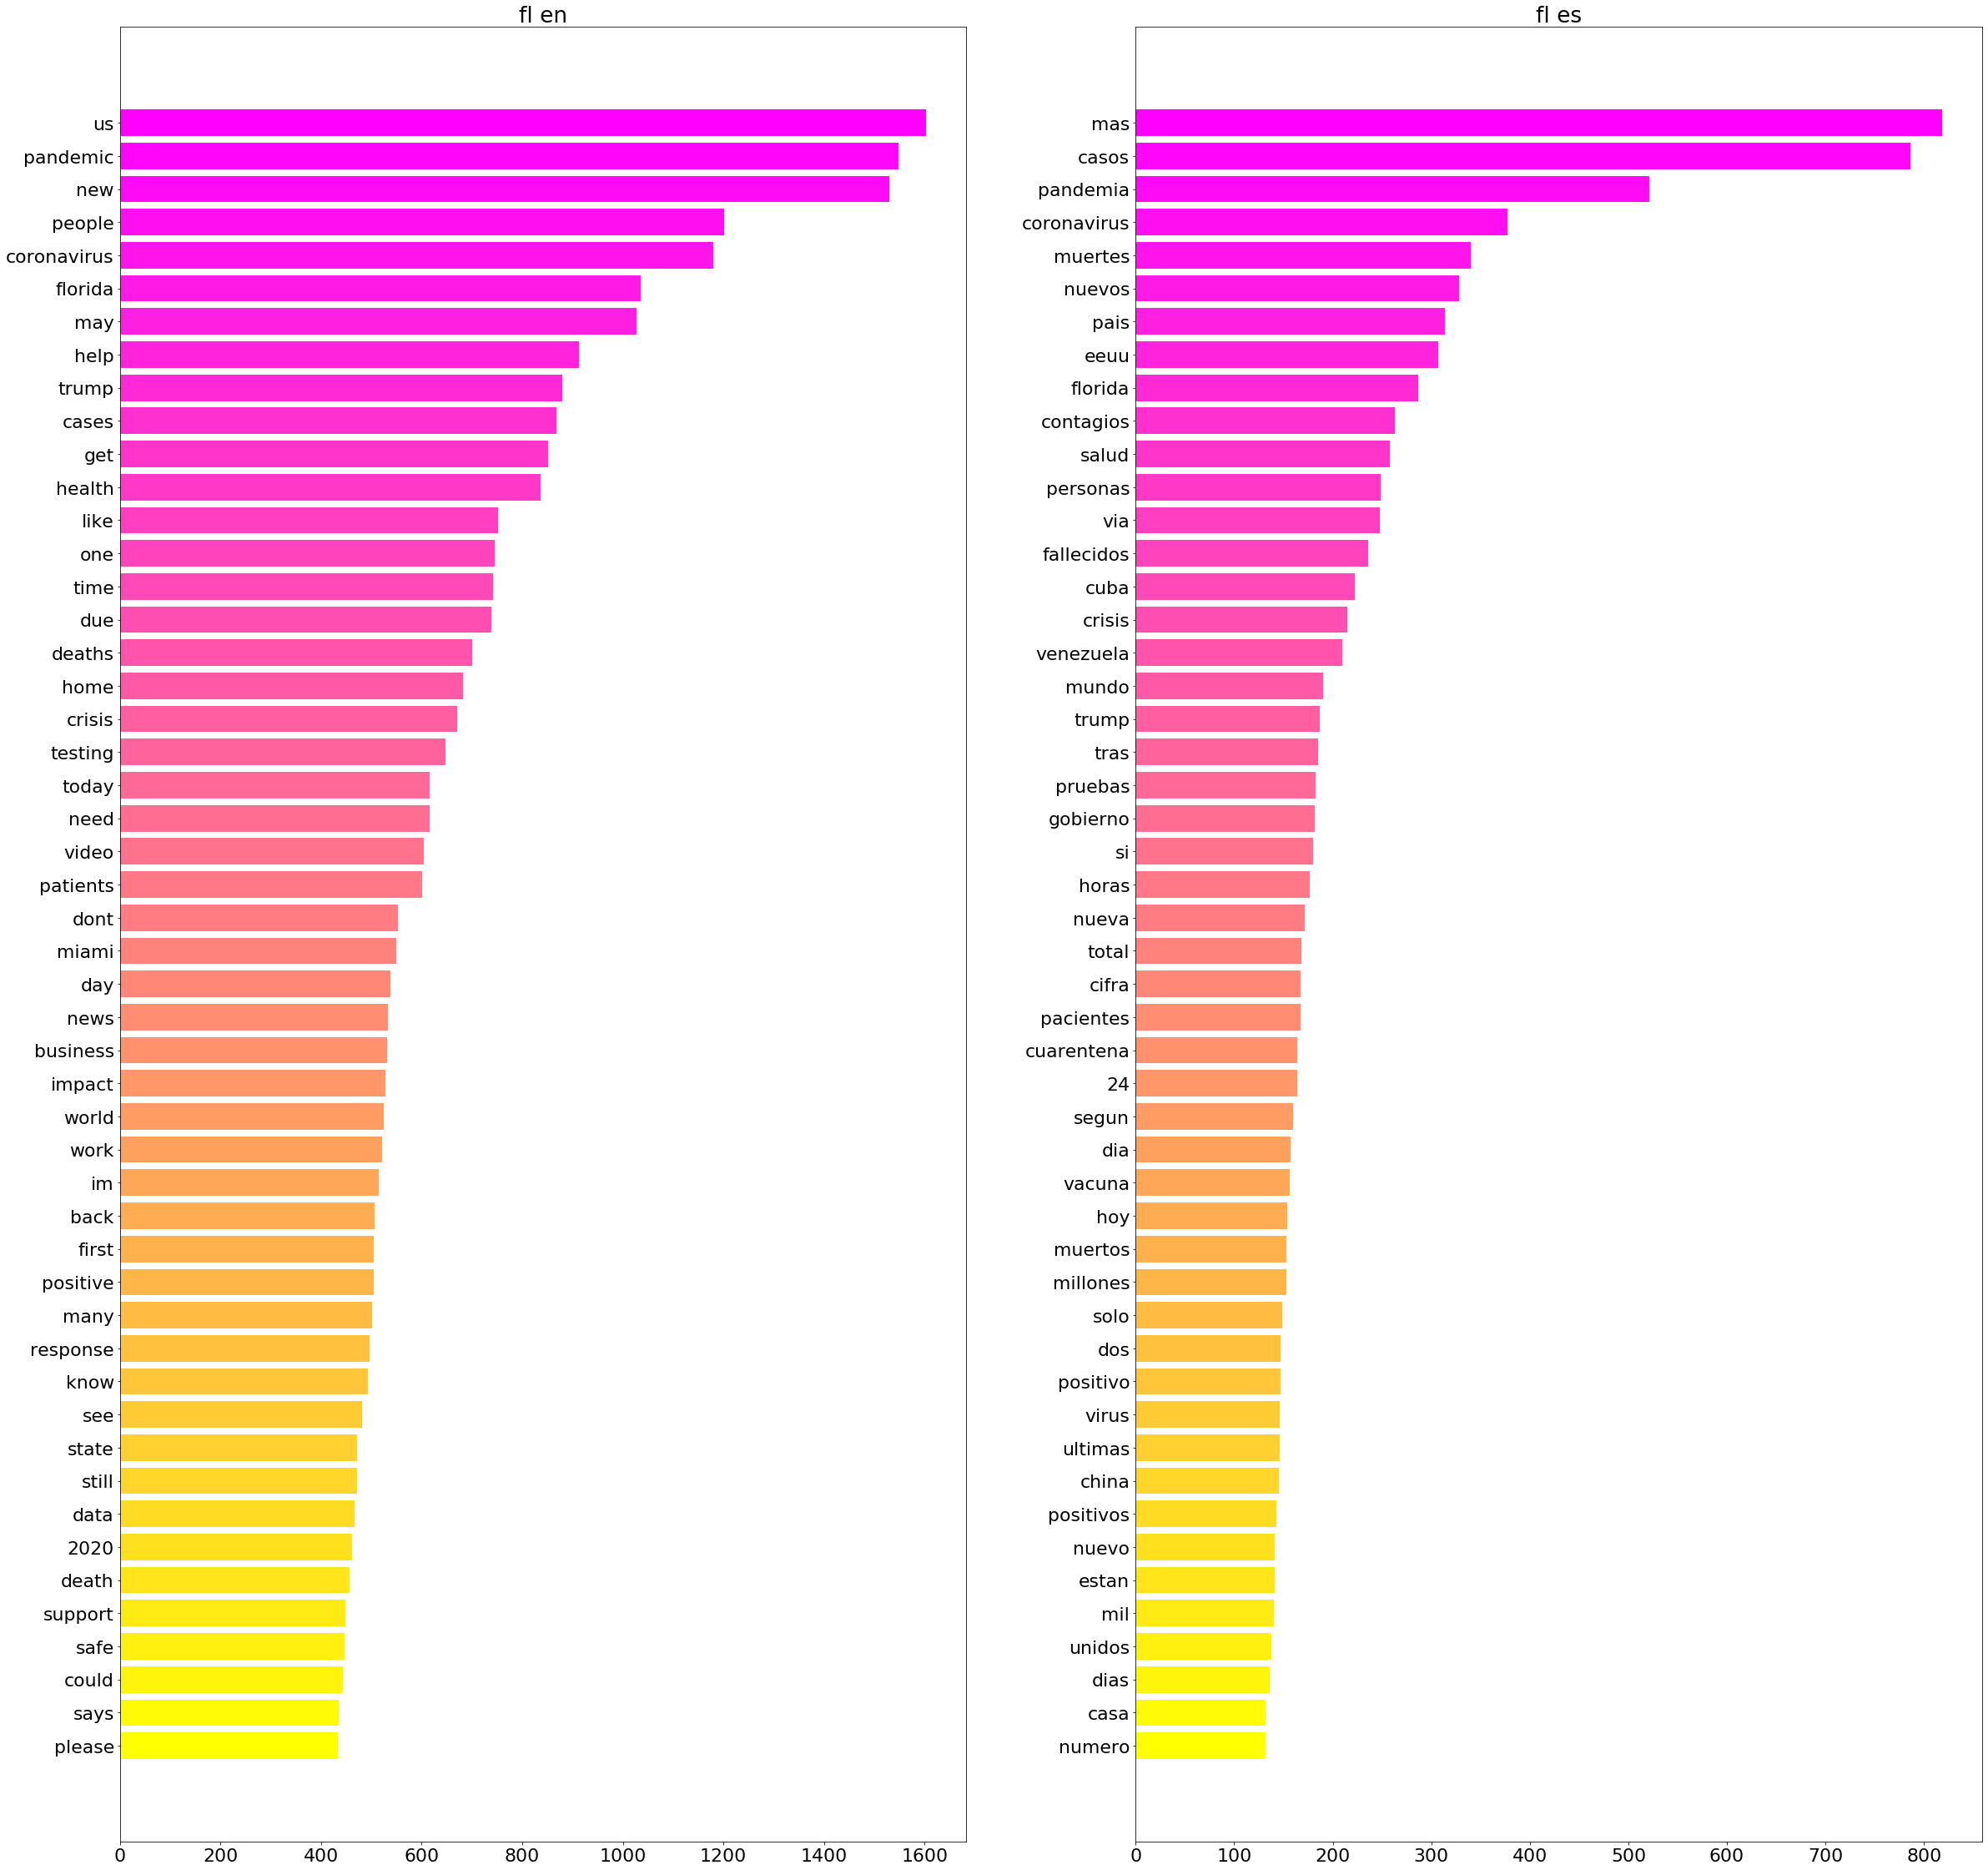

In [48]:
plot_bar_matrix(counts)

## Top 50 hashtags South Florida from April 25th to May 25th: English vs Spanish

This is the same proces but recovering the 50 most used hashtags by language in South Florida. 

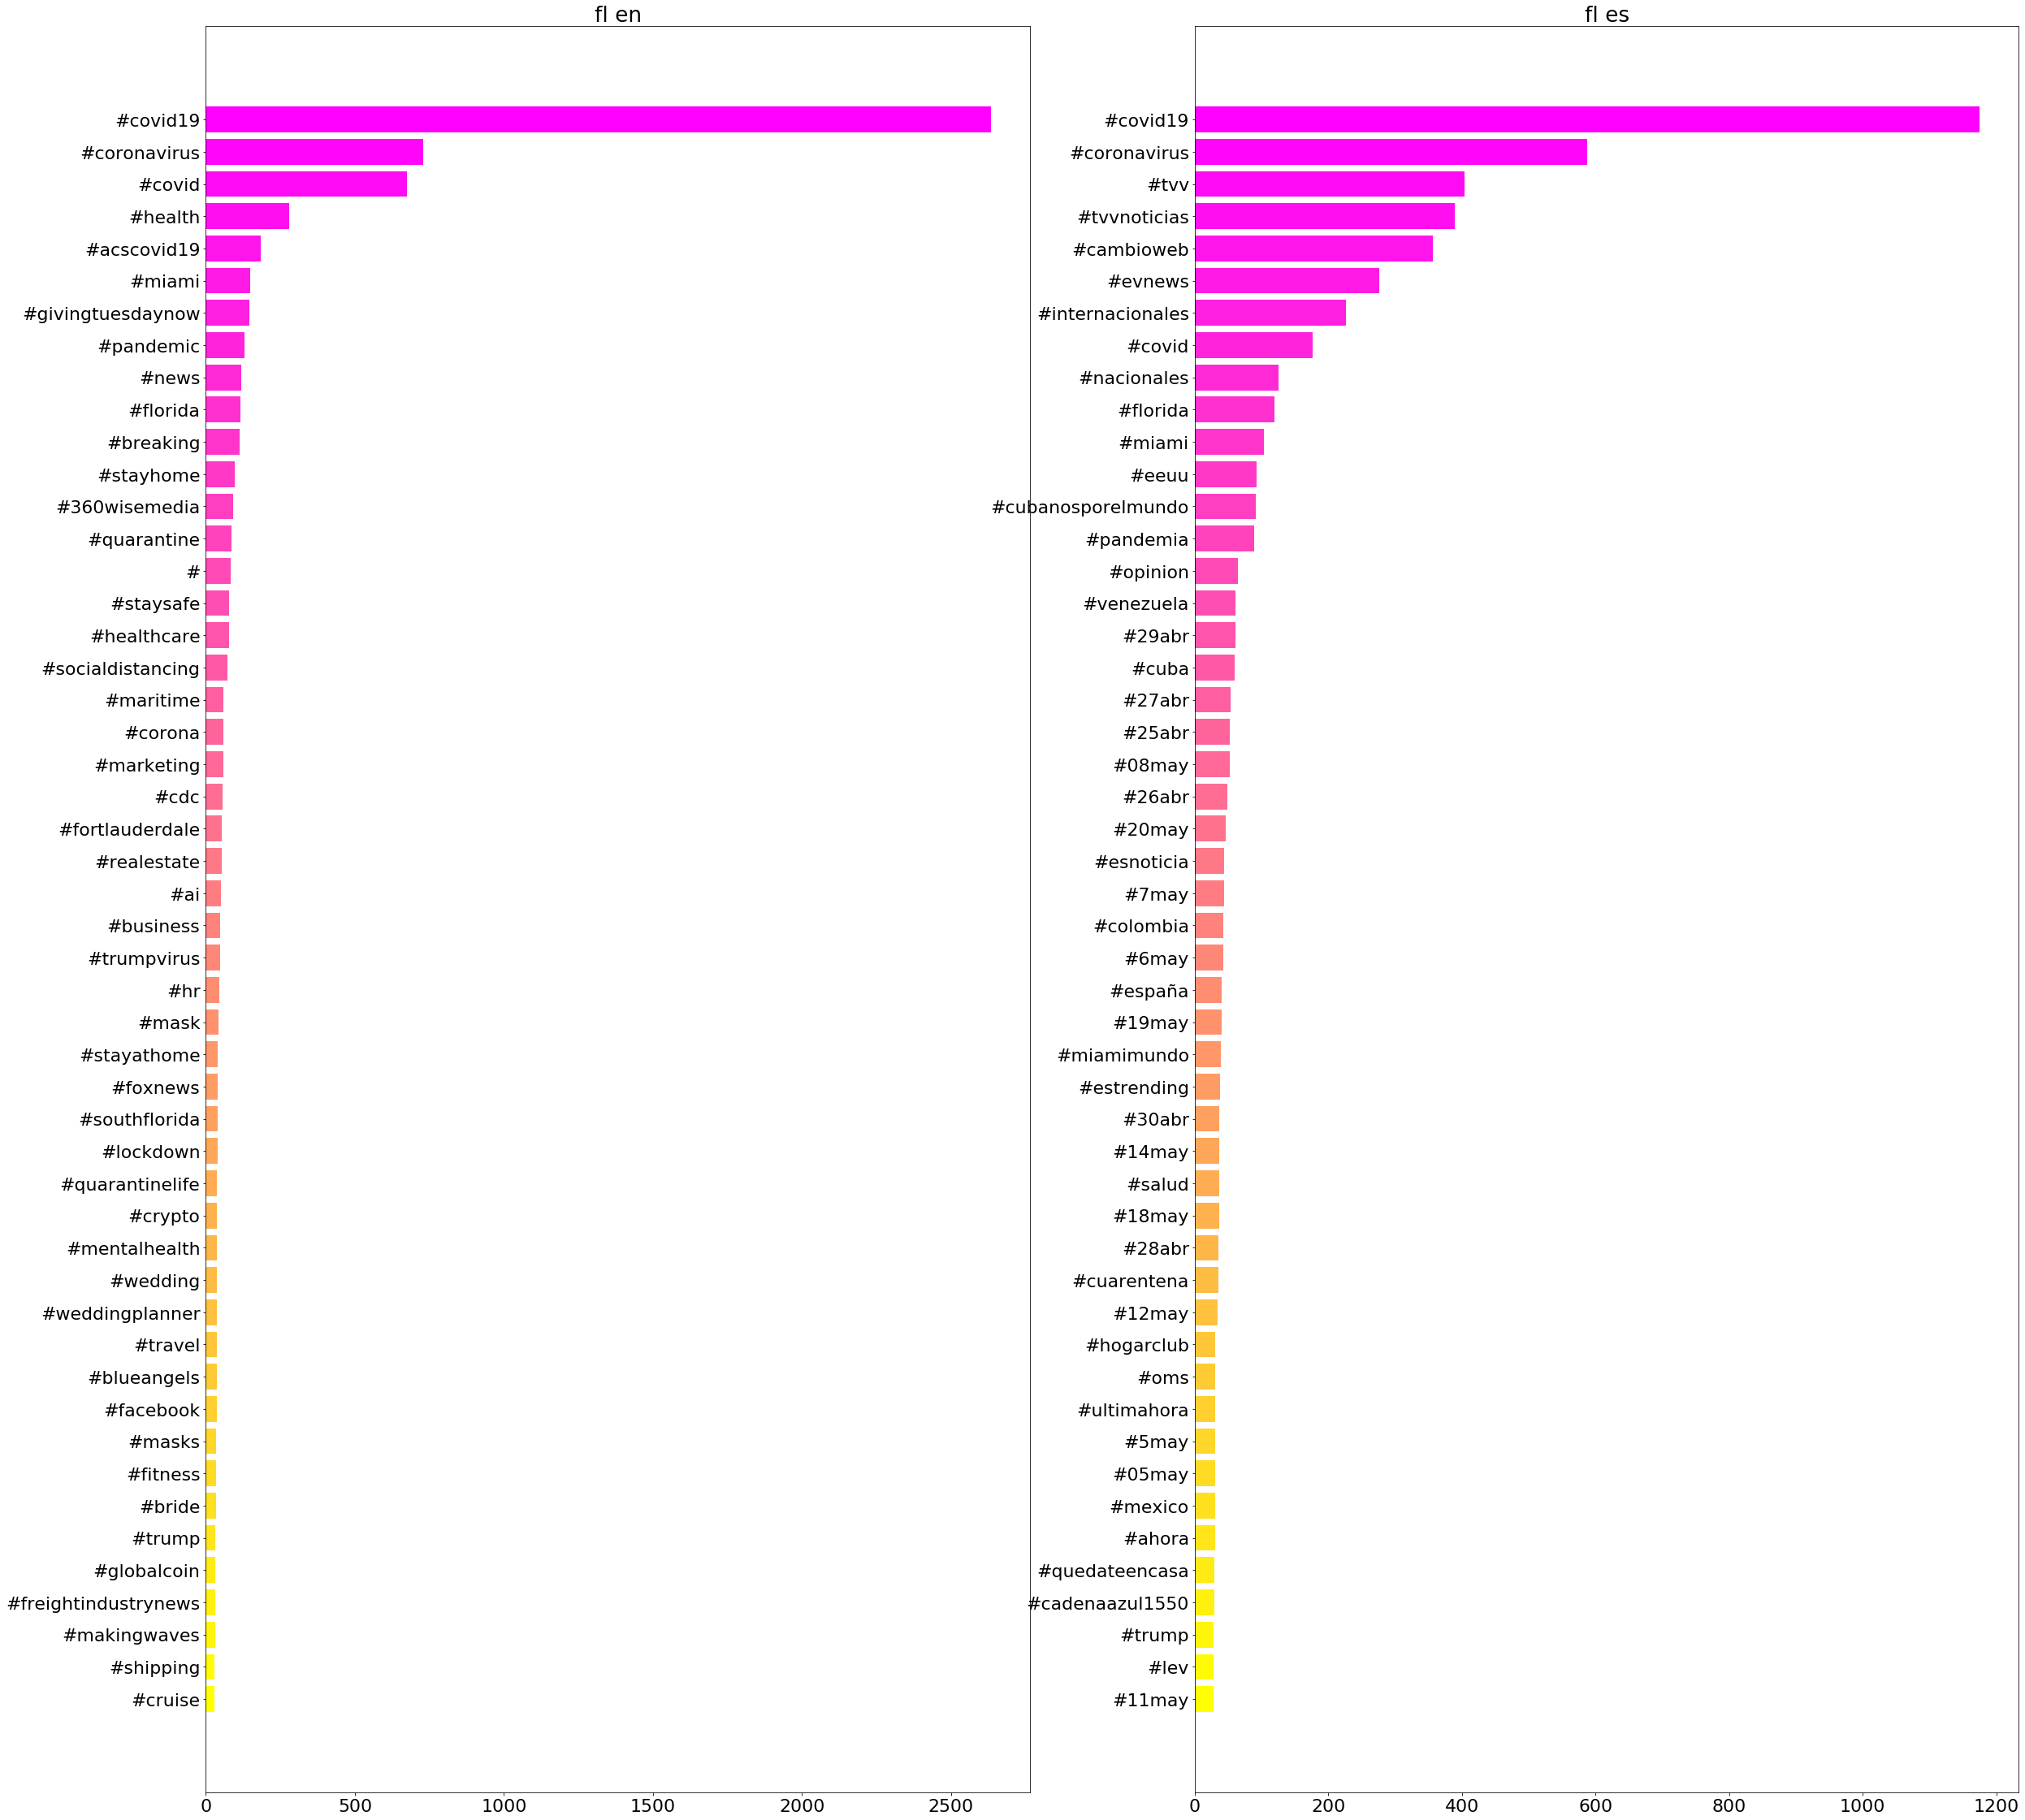

In [13]:
top_n = 50  # top 50 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'hashtags'  # set to either 'text' or 'hashtags'
df = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df.groupby(["geo", "lang"])[col_name]}
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size
def plot_bar_matrix(counts):
    fig, axes = plt.subplots(1,2)
    flattened = axes.flatten()
    for i, ((geo, lang), geo_counts) in enumerate(counts.items()):
        labels = [" ".join(w) for w, _ in geo_counts]
        y = [n for _, n in geo_counts]
        cmap = plt.get_cmap('spring')
        colors = plt.get_cmap('spring')(np.linspace(0, 1, len(labels)))
        flattened[i].set_title(f"{geo} {lang}")
        flattened[i].barh(y=range(0,50), width=y, color=colors, tick_label=labels)
        flattened[i].invert_yaxis()  # reverse the visualization order along the y-axis
plot_bar_matrix(counts)        

English and Spanish discourses in South Florida both discuss daily new cases, infected patients, deaths, testing during this global crisis. Comparing and contrasting the unique words points us to some interesting areas for further investigation.

I. The Spanish discourse seems more global. "eeuu," "Cuba," "Venezuela," "China," and "pais" suggest that the Spanish corpus discussed the pandemic on a national and international scale. "Miami," a local term, on the other hand, is unique to the English corpus, whose top words don't include any country names. Here are a few important questions to investigate:

* Were foreign countries mentioned because of the large South Florida residents of Latin America, Cuba and Venezuela in particular, descent? 
* Did these Twitter users want to compare the situation in the US to those of other countries? 
* Why such international focus is more prominent in the Spanish corpus than the English corpus?

II. Public health measures are more prominent in the Spanish corpus. "Cuarentena" and "vacuna" shows that the discussions of quarantine policies and vaccine take a significant weight in Spanish-languaged tweets, which neither is discussed in the English corpus. How shall we explain this distinction?

III. The English corpus seems to be more "interactive." "Help," "need," "support," and "please" suggest a call for action from another individual, and are unique to the English corpus. These words imply that the English tweets have a stronger intention to interact with readers and influence others' behaviors. With further concordance analysis, here are a few questions that come to mind:

* To whom are these actions directed? Government agencies, the audience at large, hospitals, etc.?
* Are these demands for others, i.e. "people need to wear masks," or calls for assistance for oneself, i.e. "my family needs support due to unemployment"? 
* Which topical area did these words mostly appear in, economics, medical, political, personal, etc?

IV. "Business" and "work" are unique to the English corpus. Does it indicate more discussions about the economic effects of the pandemic?

V. Since "gobierno" is unique to the Spanish corpus, how prominent is government-related discussions in Spanish tweets? Does the English corpus discuss government, at all? How do they differ?

It is also an interesting question to see how many tweets are produced in both different languages. [ASK DATABASE]

## Top 50 words in South Florida from May 25th to June 25th: English vs Spanish

SAT: Here is the same script but fro the following month... 

Namespace(date=[datetime.datetime(2020, 5, 25, 0, 0), datetime.datetime(2020, 6, 25, 0, 0)], func=<function handle_query at 0x7fa396f97710>, geo=['fl'], lang=['en', 'es'], stopwords=['stopwords_en.txt', 'stopwords_es.txt'])
wrote df to dhcovid_2020-5-25_to_2020-6-25_en_es_fl.csv!


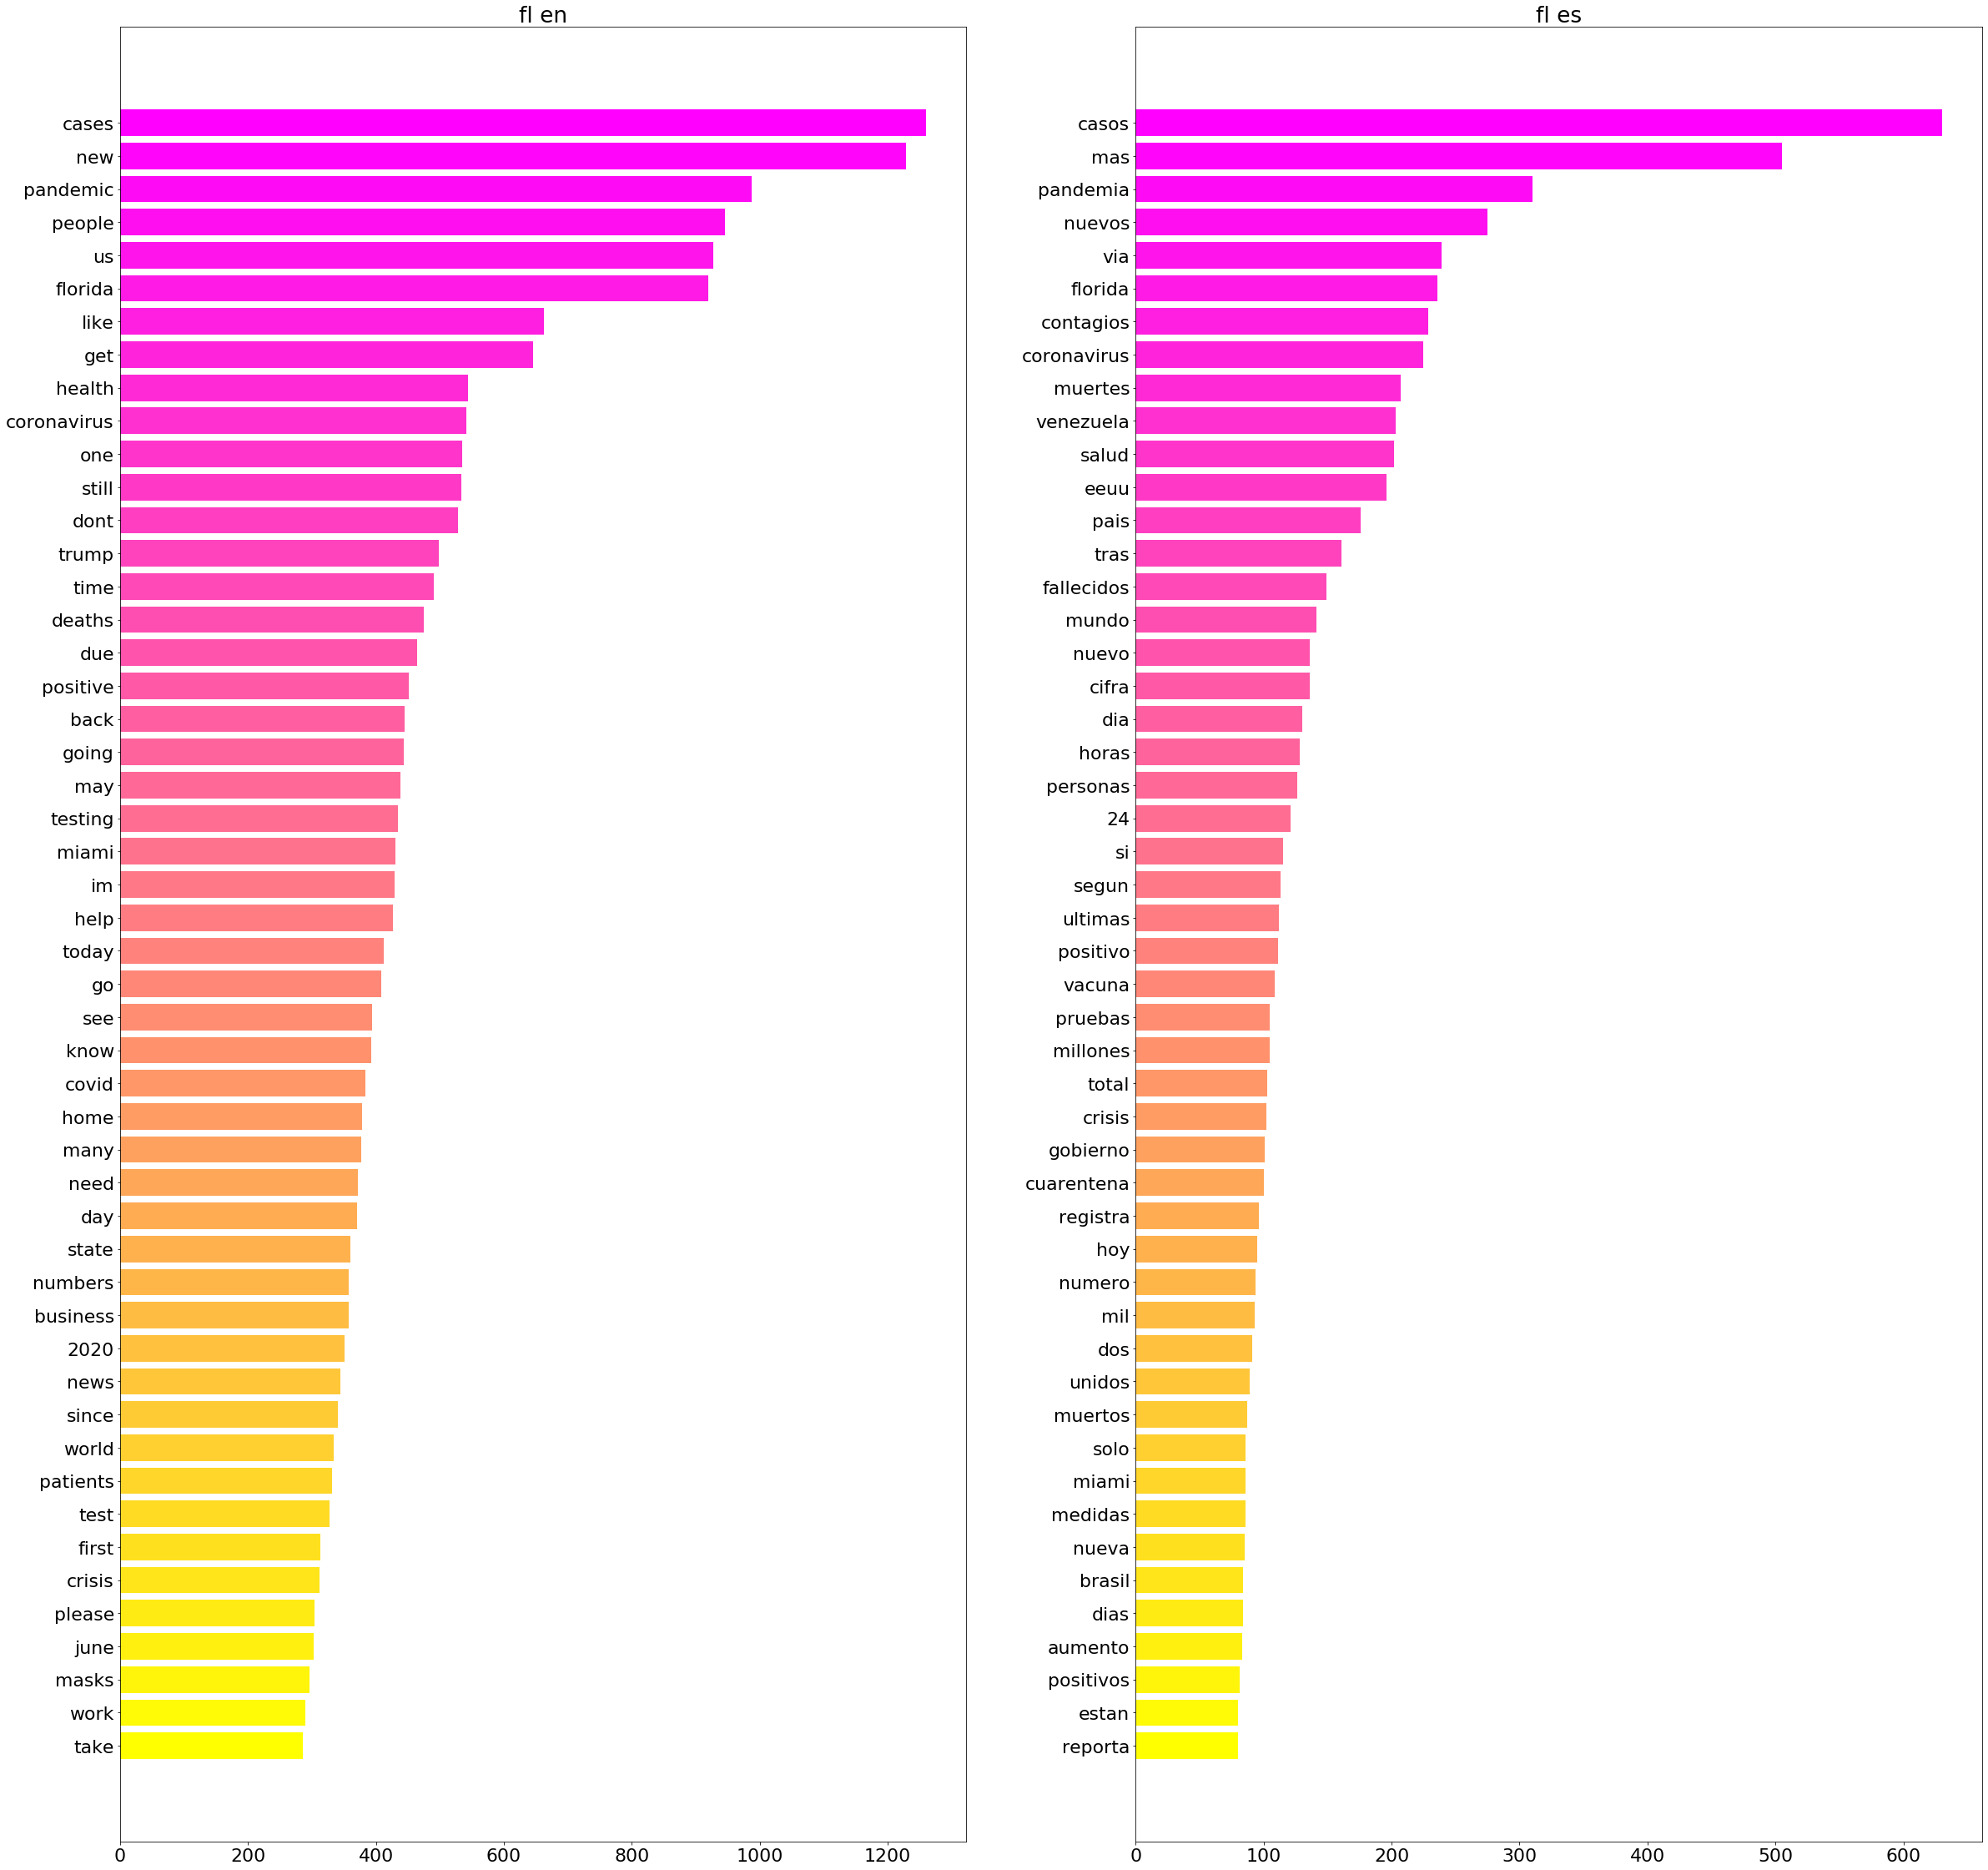

In [14]:
!python3 coveet.py query -g fl -l en es -d 2020-05-25 2020-06-25 -stopwords stopwords_en.txt stopwords_es.txt
df = pd.read_csv('dhcovid_2020-5-25_to_2020-6-25_en_es_fl.csv', index_col=0)
df['date'] = pd.to_datetime(df['date'])
df['text'] = df['text'].str.split()
df['hashtags'] = df['hashtags'].str.split()
top_n = 50  # top 50 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'text'  # set to either 'text' or 'hashtags'
df = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df.groupby(["geo", "lang"])[col_name]}
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size
def plot_bar_matrix(counts):
    fig, axes = plt.subplots(1,2)
    flattened = axes.flatten()
    for i, ((geo, lang), geo_counts) in enumerate(counts.items()):
        labels = [" ".join(w) for w, _ in geo_counts]
        y = [n for _, n in geo_counts]
        cmap = plt.get_cmap('spring')
        colors = plt.get_cmap('spring')(np.linspace(0, 1, len(labels)))
        flattened[i].set_title(f"{geo} {lang}")
        flattened[i].barh(y=range(0,50), width=y, color=colors, tick_label=labels)
        flattened[i].invert_yaxis()  # reverse the visualization order along the y-axis
plot_bar_matrix(counts)


## Top 20 hashtags South Florida from May 25th to June 25th: English vs Spanish

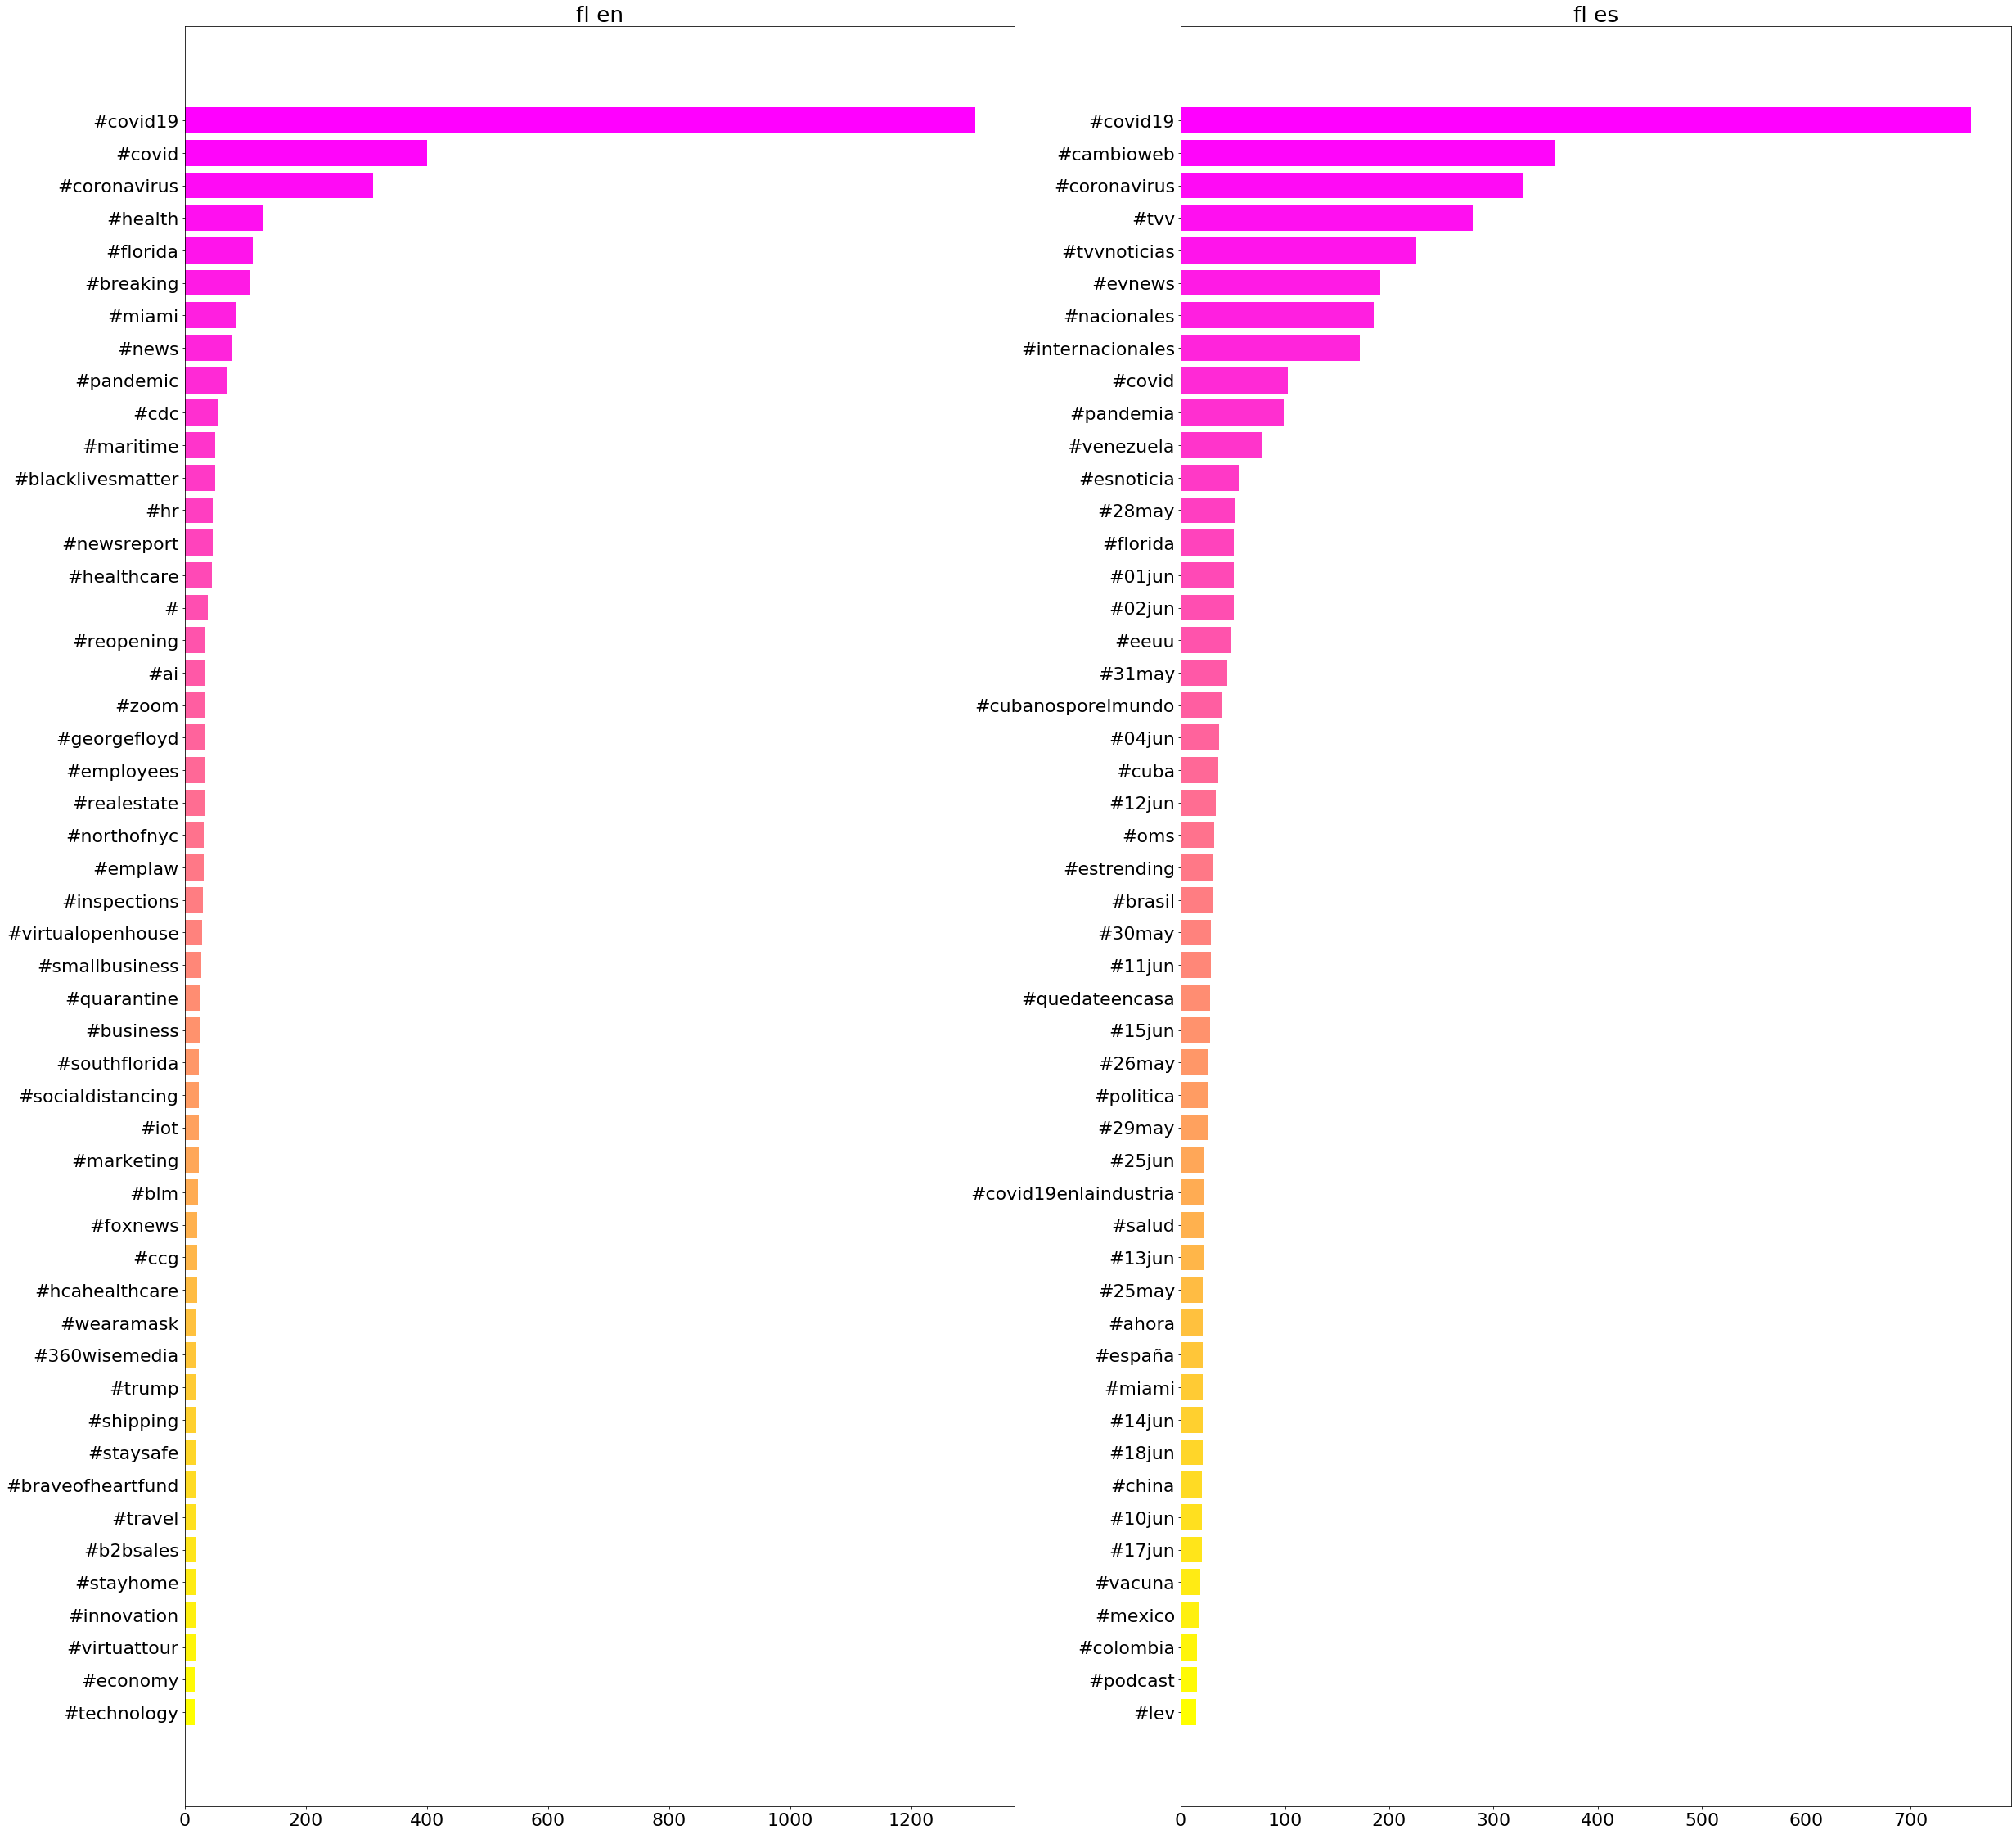

In [15]:
top_n = 50  # top 50 words
n_gram = 1  # ask for word frequency (i.e. an n-gram where n=1)
col_name = 'hashtags'  # set to either 'text' or 'hashtags'
df = df.dropna(subset=[col_name])
counts = {(g, l): Counter(count_ngrams(t, n_gram, consecutive=False)).most_common(top_n)
          for (g, l), t in df.groupby(["geo", "lang"])[col_name]}
from pylab import rcParams
rcParams['figure.figsize'] = 40, 40  # setting figure size
plt.rcParams.update({'font.size': 22})  # setting font size
def plot_bar_matrix(counts):
    fig, axes = plt.subplots(1,2)
    flattened = axes.flatten()
    for i, ((geo, lang), geo_counts) in enumerate(counts.items()):
        labels = [" ".join(w) for w, _ in geo_counts]
        y = [n for _, n in geo_counts]
        cmap = plt.get_cmap('spring')
        colors = plt.get_cmap('spring')(np.linspace(0, 1, len(labels)))
        flattened[i].set_title(f"{geo} {lang}")
        flattened[i].barh(y=range(0,50), width=y, color=colors, tick_label=labels)
        flattened[i].invert_yaxis()  # reverse the visualization order along the y-axis
plot_bar_matrix(counts)        

Let's first look at the common top words. With cases/casos and new/nuevo rising to top two, we can speculate more discussions about the increasing number of cases in South Florida after late May. "Miami" shows up in both English and Spanish corpora, indicating more attention paid to this area by Spanish-language Twitter users. 

The list of unique words further reveals some patterns and research questions. 

I. The Spanish corpus remains more "global." Venezuela and Cuba are again hot topics among the Spanish-speaking population, but this time Venezuela appears first, with Brazil added to the list and China disappeared. 

"Masks" is (finally) a top word in the English corpus. This aligns with various states' mandatory mask policies, calls for responsible protesting during the Black Lives Matter movement, and reflects an improved public awareness of responsible preventive measures.

SAT: Dieyun, can you add the script to recover the common top hashtag and the unique top hashtags here??